## 训练模型
##### 指设置模型的参数使得这个模型在训练集的表现较好

#### 通常我们将机器学习模型和训练算法当作黑箱子来处理，如果对其内部的工作流程有一定了解的话，可以快速的找到恰当的机器学习模型，合适的训练算法，以及一个好的假设集，同时有助于更好地调试参数以及更有效的误差分析

### 首先，以简单的线性回归模型为例，讨论两种不同的训练方法来得到模型的最优解：
* 直接使用封闭方程进行求根运算，得到模型在当前训练集上的最优参数
* 使用迭代优化方法：梯度下降（GD），批量梯度下降（Batch GD），小批量梯度下降（Mini-batch GD），随机梯度下降（Stochastic GD）

### 其次，研究更复杂的模型：多项式回归，可以拟合非线性数据集，由于拥有更多的参数，更容易过拟合，介绍几种正则化方法减少模型出现过拟合的风险
### 最后，介绍常用于分类的模型：Logistic回归和Softmax回归

### **一、线性回归**
#### 线性模型一般化描述：通过计算输入变量的加权和，并加上一个常数偏执项（截距项）来得到一个预测值
#### 1.1线性回归预测模型
#### $\hat{y}=\theta_0+\theta_1x_1+\theta_2x_2+\dots+\theta_nx_n$
* $\hat{y}$表示预测结果
* n表示特征的个数
* x_i表示第i个特征的值
* $\theta_j$表示第j个参数（包括偏置项$\theta_0$和特征权重值$\theta_1,\theta_2,\dots,\theta_n$)

#### 1.2线性回归预测模型（向量形式）
#### $\hat{y}=h_\theta$(**x**)$=\theta^T\cdot$**x**
* **x**为**每个样本中特征值的向量形式**，包括$x_1$和$x_n$，而且$x_0$恒为1
* $h_\theta$表示参数为$\theta$的假设函数

#### 2.评定标准
#### 线性回归模型的MSE损失函数
#### $MSE(X,h_\theta)=\frac{1}{m}\sum_{i=1}^{m}(\theta^T \cdot x^{(i)}-y^{(i)})^2$

#### 3.正太方程
##### 为了找到最小化损失函数的$\theta$值，可以通过正太方程直接得到最后的解果
#### $\hat{\theta}=(X^T\cdot X)^{-1}\cdot X^T\cdot y$
* $\hat{\theta}$指最小化损失$\theta$的值
* $y$是一个向量，其包含了$y^{(1)}$到$y^{(m)}$的值

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)  # 生成100x1的数组，在[0, 1)之间
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # np.x_的用法，数组中是列向量，因为x_0恒为1，100个样本两个特征
print(X_b.shape)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best  # 接近4和3

(100, 2)


array([[4.09320243],
       [2.9444193 ]])

Text(0,0.5,'y')

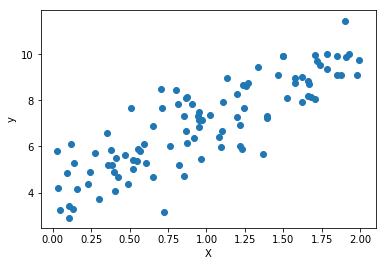

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

$\begin{pmatrix}
{\hat{y}_1}\\
{\hat{y}_2}\\
{\vdots}\\
{\hat{y}_n}\\
\end{pmatrix}$
=
$\begin{pmatrix}
{\theta_0}&{\theta_1}
\end{pmatrix}$
$\cdot$
$\begin{pmatrix}
1&{x_1}\\
1&{x_2}\\
{\vdots}\\
1&{x_n}\\
\end{pmatrix}$
$即\begin{pmatrix}
{\hat{y}_1}\\
{\hat{y}_2}\\
{\vdots}\\
{\hat{y}_n}\\
\end{pmatrix}
=
\theta_0+\theta_1\cdot
\begin{pmatrix}
{x_1}\\
{x_2}\\
{\vdots}\\
{x_n}\\
\end{pmatrix}$



In [5]:
X_new = np.array([[0],
                  [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.09320243],
       [9.98204103]])

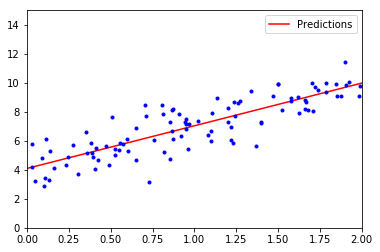

In [6]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_  # 截距（theta0）和系数(theta1)

(array([4.09320243]), array([[2.9444193]]))

In [8]:
lin_reg.predict(X_new)

array([[4.09320243],
       [9.98204103]])

#### 4.计算复杂度
* 运算复杂度在$O(n^{2.4})到O(n^3)$之间，如果将特征个数翻倍，则计算时间大概变为原来的5.3到8倍
* 但是只要有足够大的内存，预测速度非常快，特征个数翻倍，预测时间也仅仅是原来的两倍

### 二、梯度下降
#### 梯度下降的整体思路是通过迭代来逐渐调整参数使得损失函数达到最小值
* 它计算误差函数关于参数向量$\theta$的局部梯度，同时沿着梯度下降的方向进行下一次迭代，当梯度值为0的时候就达到了误差函数最小值
* 梯度下降中一个重要的参数是步长，超参数学习率的值决定了步长的大小
* 当我们使用梯度下降时，应该保证所有的特征有着相近的尺度范围（例如使用StandardScaler类），否则它将需要很长的时间才能收敛
* 训练模型意味着找到一组模型参数，这组参数可以在训练集上使得损失函数最小

#### 1.批量梯度下降
#### 计算关于$\theta_j$的损失函数的偏导数，记为$\frac{\partial}{\partial \theta_j}MSE(\theta)$
#### $\frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m} (\theta^T \cdot x^{(i)} - y^{(i)})$
#### 为了避免单独计算每一个梯度，可以使用梯度向量,记为$\nabla_\theta MSE(\theta)$
#### $\nabla_\theta MSE(\theta) = \begin{pmatrix} 
                        {\frac{\partial}{\partial \theta_0}MSE(\theta)}\\
                        {\frac{\partial}{\partial \theta_1}MSE(\theta)}\\
                        {\vdots}\\
                        {\frac{\partial}{\partial \theta_n}MSE(\theta)}\\
                        \end{pmatrix} = \frac{2}{m}X^T\cdot(X\cdot\theta-y)$
#### 这个方程每一步计算都包含了整个训练集X，因此称为批量梯度下降。在大数据集上其会变得相当慢，但是梯度下降的运算规模和特征的数量成正比
#### 学习率$\eta$和梯度下降的积决定了下山时每一步的大小
#### 梯度下降步长：
#### $\theta^{(next step)} = \theta - \eta\nabla_\theta MSE(\theta)$

In [9]:
eta = 0.1  # 学习率
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # 随机初始值
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta -= eta*gradients

In [10]:
theta

array([[4.09320243],
       [2.9444193 ]])

* 学习率：可以使用网格搜索找到一个好的学习率
* 迭代次数：设置一个非常大的迭代次数，当梯度向量小于一个值$\epsilon$（容差）时结束迭代
* 收敛速率：当损失函数是凸函数，同时它的斜率不能突变，那么它的批量梯度下降算法固定学习率后，收敛速率为$O(\frac{1}{iterations})$

#### 2.随机梯度下降
* 每一步梯度计算只随机选取训练集中的一个样本，使得随机梯度下降可以在大规模训练集上使用
* 由于随机性，它到达最小值不是平缓的下降，损失函数忽高忽低，只是在大体上呈现下降趋势。最后，它会非常接近最小值，但不会停止在一个值上，而是在这个值附近摆动，因此算法停止的时候不是最优值
* 当损失函数很不规则时，随机梯度下降能够跳过局部最小值，因此在寻找全局最小值上比批量梯度下降表现要好
* 解决不能到达最小值的方法：
    * 开始时每一步较大，有助于快速前进的同时跳过局部最小值
    * 然后变得越来越小，从而算法达到全局最小值
    * 这个过程称为“模拟退火”

In [11]:
n_epochs = 50
t0, t1 = 5, 50  # 决定每次学习率的函数learning schedule的超参数

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.rand(2, 1)

for epoch in range(n_epochs):
    for i in range(m):  # m=100,样本数
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]  # 获取第random_index行数据
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta -= eta * gradients

In [12]:
theta

array([[4.22278755],
       [2.90205347]])

* 由于每个实例的选择是随机的，有的实例可能在每一代中都被选到，这样其他的实例也可能一直不被选到。
* 可以在每一代中将训练集打乱重排，但是收敛速度会非常的慢

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.0980069]), array([2.95650676]))

#### 3.小批量梯度下降
* 在迭代的每一步，批量梯度下降使用整个训练集，随机梯度下降仅使用一个实例，而小批量随机梯度下降使用一个随机的小型实例集。
* 比随机梯度下降的主要优点在于可以通过矩阵运算的硬件优化得到一个较好的训练表现，尤其在使用GPU的时候
* 小批量梯度下降会比随机梯度下降更靠近最小值

In [15]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        # t = epoch * m + i,效果差不多
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [16]:
theta

array([[4.07994194],
       [2.92223034]])

|Algorithm|Large m |Out-of-core support|Large n|Hyperparams|Scaling required|Scikit-Learn|
|----------------|-----------|---------------------|-----------|---------------|------------------|------------|
|Normal Equation |Fast     |No             |Slow     |0          |No           |LinearRegression|
|Batch GD|Slow|No|Fast|2|Yes|n/a|
|Stochastic GD|Fast|Yes|Fast|$\ge2$|Yes|SGDRegression|
|Mini-batch GD|Fast|Yes|Fast|$\ge2$|Yes|n/a|

### 三、多项式回归
#### 1.可以使用线性模型来拟合非线性数据
#### 对每个特征进行加权后作为新的特征，然后训练一个线性模型在这个扩展的特征集

In [17]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [18]:
# 生成非线性数据 
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

Text(0.5,1,'带噪声的非线性数据')

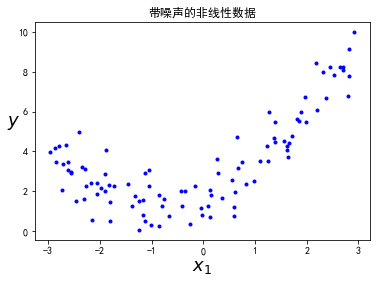

In [19]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.title('带噪声的非线性数据')
# plt.axis([-3, 3, 0, 10])

In [20]:
# 让训练集中每个特征的平方作为新特征
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [21]:
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

#### X_poly现在包含原始特征$X$并加上了这个特征的平方$X^2$

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [23]:
y_new = lin_reg.predict(X_poly)
y_new[0]

array([1.39842532])

[-3, 3, 0, 10]

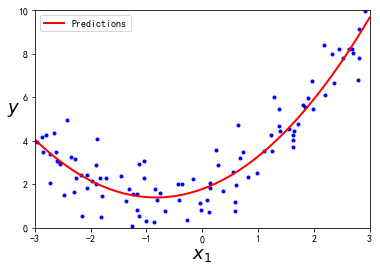

In [24]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left')
plt.axis([-3, 3, 0, 10])

#### 模型预测函数$\hat{y}=0.50x_1^2+0.95x_1+1.89$，而原始函数为$y=0.5x_1^2+1.0x_1+2.0$再加上一些高斯噪声
#### 当存在多个特征时，多项式回归能够找出这些特征之间的关系
#### 如果有两个特征$a$和$b$，使用3阶(degree=3)的LinearRegression时，不仅有$a^2,a^3,b^2$以及$b^3$，同时也会出现它们的其他组合项$ab,a^2b,ab^2$
#### PolynomialFeatures(degree=d)把一个包含n个特征的数组转换为一个包含$\frac{(n+d)!}{d!n!}$特征的数组，要小心大量特征的组合爆炸

#### 2.学习曲线

[-3, 3, 0, 10]

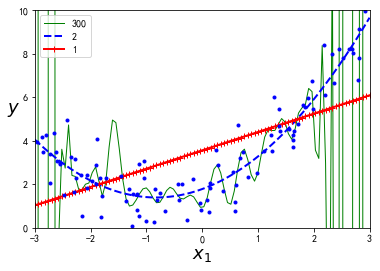

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

#### 可以看到高阶多项式回归模型在这个训练集上严重过拟合了，线性模型则欠拟合。
* 交叉验证：
    * 如果一个模型在训练集上表现良好，通过交叉验证得出泛化能力很差，则是过拟合
    * 如果在这两个方面都表现不好，则是欠拟合了
* 观察学习曲线：
    * 画出模型在训练集上的表现
    * 画出以训练集规模为自变量的训练集函数

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14) 

[0, 80, 0, 3]

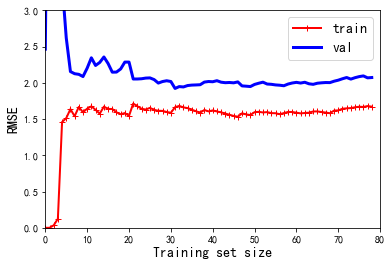

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])

#### 首先，观察训练集的表现：
* 当样本很少的时候，模型能够很好的拟合，所以曲线从零开始
* 当加入新的样本时，由于样本中含有噪声，数据不是线性的，拟合困难，误差也会一直增大，最终趋于平缓

#### 其次，观察验证集的表现：
* 当样本非常少的时候，模型不能恰当的泛化，一开始误差很大
* 当训练样本增多时，模型效果变好，但是一线直线不可能很好的拟合这些数据，因此最终区域平缓

#### 总结：这是一个典型的欠拟合模型，两条曲线都到达高原地带并趋于平缓，并且最后两条曲线非常接近，同时误差值非常大

[0, 80, 0, 3]

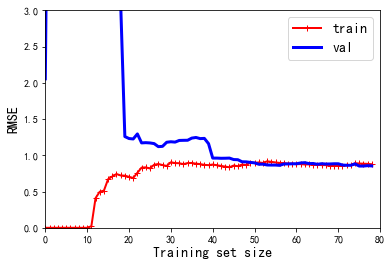

In [28]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

* 在训练集上，误差要比线性回归模型要低的多
* 两条曲线之间有间隔，意味着在训练集上的表现要比验证集上好得多，这也是模型过拟合的显著特点

#### （1）改善模型过拟合的一种方法是提供更多的训练数据，直到训练误差和验证误差相等
#### （2）一个模型的泛化误差由三个不同误差的和决定：
* 偏差：由于错误的假设决定（例如实际是二次模型，却假设为线性模型），高偏差模型容易出现欠拟合
* 方差：由于模型对训练数据的细微变化较为敏感，多自由度的模型容易有高方差，导致模型过拟合
* 不可约误差：由于数据本身的噪声决定的，降低这部分误差的唯一方法就是进行数据清洗（修复数据源，修复坏的传感器，识别和剔除异常值）

### 四、线性模型的正则化
#### 降低模型过拟合的好方法是正则化这个模型：模型有越少的自由度，就越难以拟合数据
#### 正则化的典型实现就是约束模型中参数的权重

#### 1.岭(Ridge)回归
#### 是线性回归的正则化版：在损失函数上直接加上一个正则项$\alpha\sum_{i=1}^{n}\theta_i^2$，使得学习算法不仅能够拟合数据，而且能够使模型的参数权重尽量小
#### 岭回归损失函数：
#### $J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2$
#### 其中$\alpha$是正则化模型的强度，若非常大，则所有的权重最后都接近0
#### 可以看到偏差$\theta_0$没有被正则化，定义$w$作为特征的权重向量（$\theta_1到\theta_n$），那么正则项可以简写成$\frac{1}{2}(\lVert w\lVert_2)^2$

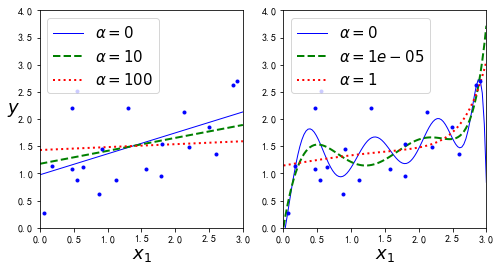

In [29]:
from sklearn.linear_model import Ridge

np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1  # 线宽
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)


#### 岭回归的封闭方程的解：
#### $\hat{\theta} = (X^T\cdot X + \alpha A)^{-1}\cdot X^T\cdot y$

#### (1)使用scikit-learn对封闭方程求解：

In [30]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[1.55071465]])

#### (2)使用随机梯度下降进行求解：

In [31]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([1.12795912])

#### penalty参数是正则项的惩罚类型，指定l2表明要在损失函数上添加一项：权重向量l2范数平方的一半，这就是简单的岭回归

#### 2.Lasso回归
#### 是另一种正则化版的线性回归，使用权重向量的l1范数，而不是权重向量的l2范数
#### Lasso回归的损失函数：
#### $J(\theta) = MSE(\theta)+\alpha\sum_{i=1}^{n}|\theta_i|$

* Lasso回归的一个重要特征是它倾向于完全消除最不重要的特征的权重（即将它们设置为0），自动地进行特征选择同时输出一个稀疏模型（即具有很少的非零向量）
* Lasso损失函数再$\theta_i=0(i=1,2,\cdots,n)$处无法处理微分运算，但是使用子梯度向量$\vec g$后可以再进行运算

#### Lasso回归子梯度向量
#### $g(\theta, J) = \nabla_\theta MSE(\theta)+\alpha \begin{pmatrix}{sign(\theta_1)}\\{sign(\theta_2)}\\{\vdots}\\{sign(\theta_n)}\end{pmatrix}where sign(\theta_i)=\begin{cases}{-1, \theta_i<0}\\{0, \theta_i=0}\\{+1, \theta_i>0}\end{cases}$

In [32]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.50467735])

#### 3.弹性网络(ElasticNet)
#### 弹性网络介于岭回归和Lasso回归之间，它的正则项是Ridge回归和Lasso回归的简单混合，同时可以控制它们的混合率r
* 当r=0，弹性网络就是Ridge回归
* 当r=1，弹性网络就是Lasso回归

#### 弹性网络损失函数
#### $J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}|\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_i^2$

### 线性回归，岭回归，Lasso回归和弹性网络回归的选择：
* 有正则项通常表现更好，避免使用简单的线性回归
* 岭回归是一个很好的首选项
* 如果特征仅有少数是真正有用的，选择Lasso回归和弹性网络回归，因为它们可以将无用特征的权重降为零
* 弹性网络回归的表现一般比Lasso好，因为当特征数量比样本的数量大的时候，或者特征之间有很强的相关性时，Lasso回归会表现的不规律

In [33]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.50467735])

#### 4.早期停止法(Early Stopping)
#### 一种特殊的正则化方法，就像梯度下降在验证错误达到最小值时立即停止训练那样，称为早期停止法
#### 使用批量梯度下降训练一个非常复杂的模型，随着训练的进行算法一直在学习，预测误差RMSE自然而然的下降
#### 然而一段时间以后，验证误差停止下降，并开始上升，**说明模型在训练集上开始出现过拟合**
#### 一旦验证错误到达最小值，便提前停止训练，这种简单有效的正则化方法被称为“完美的免费午餐”

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated

[0, 500, 0, 4]

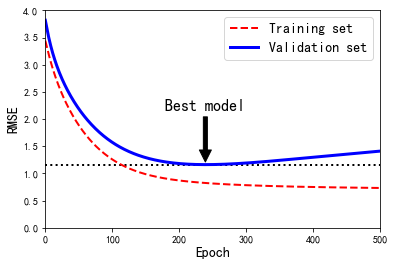

In [34]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)
    
X_train_scaled = poly_scaler.fit_transform(X_train)
X_val_scaled = poly_scaler.transform(X_val)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_scaled, y_train)
    y_train_pred = sgd_reg.predict(X_train_scaled)
    y_val_pred = sgd_reg.predict(X_val_scaled)
    train_errors.append(mean_squared_error(y_train_pred, y_train))
    val_errors.append(mean_squared_error(y_val_pred, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

# best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], 'k:', linewidth=2)
plt.plot(np.sqrt(train_errors), 'r--', linewidth=2, label='Training set')
plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation set')
plt.legend(loc='upper right', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.axis([0, 500, 0, 4])

In [35]:
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1,
                       warm_start=True, # 调用fit()方法后，训练会从停下来的地方继续，而不是从头重新开始
                       penalty=None,
                       learning_rate='constant',
                       eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_scaled, y_train)
    y_val_pred = sgd_reg.predict(X_val_scaled)
    val_error = mean_squared_error(y_val_pred, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated

E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
E:\Anacond\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated

### 五、逻辑回归
#### 一些回归算法可以用于分类（反之亦然），Logistic回归通常用于估计一个实例属于某个特定类别的概率

#### 1.概率估计
#### 像线性回归模型一样，Logistic回归模型计算输入特征的加权和（加上偏差项），但它不像线性回归模型那样直接输出结果，而是把结果输入logistic()函数进行二次加工后进行输出
#### (1) 逻辑回归模型的概率估计（向量形式）:
#### $\hat{p} = h_\theta(x) = \sigma(\theta^T\cdot x)$
#### logistic函数用$\sigma()$表示，其是一个sigmoid函数，输出介于0和1之间
#### (2) 逻辑函数：
#### $\sigma(t) = \frac{1}{1+exp(-t)}$
#### (3) 逻辑回归预测模型：
#### $\hat{y} = \begin{cases}{0, \hat{y}<0.5}\\{1, \hat{y}\geq0.5}\end{cases}$

#### 2.训练和损失函数
#### 训练的目的是设置参数向量$\theta$，使得正例（y=1）概率增加，负例（y=0）的概率减少，通过在单个训练实例x的损失函数来实现
#### (1) 单个样本的损失函数
#### $c(\theta) = \begin{cases}{-log(\hat{p}),y=1}\\{-log(1-\hat{y}),y=0}\end{cases}$
#### 整个训练集的损失函数只是所有训练实例的平均值，可以用一个表达式来统一表示，称为对数损失：
#### (2) 逻辑回归损失函数：
#### $J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(1)})log(1-\hat{y}^{(i)})]$
* 这个损失函数对于求解最小化损失函数的$\theta$是没有公式解的（没有等价的正态方程）
* 这个损失函数是凸函数，所以梯度下降一定能找到全局最小值（如果学习率不是太大，并且你等待足够长的时间）

#### (3) 逻辑回归损失函数的偏导数
#### $\frac{\partial}{\partial\theta_j}J(\theta_j)=\frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^T\cdot x^{(i)})-y^{(i)})x_{j}^{(i)}$
* 首先，计算每个样本的预测误差
* 然后，误差项乘以第j项特征值
* 最后，求出所有训练样本的平均值
#### 一旦有了包含所有偏导数的梯度向量，便可以在梯度向量上使用批量梯度下降算法

#### 3.决策边界

In [36]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [37]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [38]:
X = iris['data'][:, 3:]  # 花瓣宽度
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [39]:
y = (iris['target'] == 2).astype(np.int)
y  # 布尔型，不是2的target返回0，是2的target返回1，相当于一个二分类

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)  # C是控制正则化强度的参数，C越大模型正则化强度越低

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
# 预测花瓣宽度在0到3厘米的概率估计
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new.shape

(1000, 1)

In [42]:
y_proba = log_reg.predict_proba(X_new)
y_proba.shape

(1000, 2)

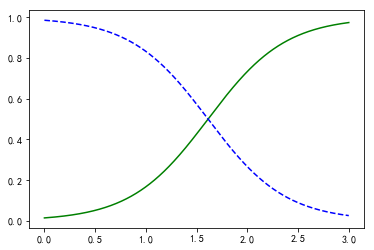

In [43]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')  # 是2类型的预测概率估计
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Virginica')  # 不是2类型的预测概率估计

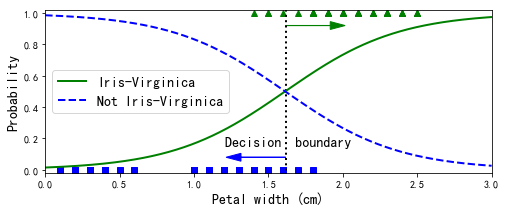

In [44]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

* Virginia花的花瓣宽度在1.4厘米到2.5厘米之间，而其他花的花瓣范围在0，1厘米到1.8厘米
* 在大约2厘米以上，分类器十分肯定这朵花是Virginia花
* 在大约1厘米一下，非常肯定这朵花不是Virginia花
* 在这两个极端之间分类器是不确定的
* 使用predict()方法，将返回一个最可能的结果

In [45]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#### 逻辑回归模型也可以$l1$或者$l2$惩罚使用正则化，默认$l2$，参数$C$控制正则化强度

### 六、Softmax回归
#### Logistic回归模型可以直接推广到支持多类别分类，不必组合和训练多个二分类器，其称为Softmax回归或者多类别Logistic回归
* 给定一个实例x时，Softmax回归模型首先计算k类的分数$s_k(x)$
* 然后将分数应用到Softmax函数（也称为归一化指数），估计出每类的概率

#### (1)k类的Softmax得分：
$s_k(x) = \theta^T\cdot x$
#### 每个类都有自己独一无二的参数向量$\theta_k$,所有这些向量通常作为行放在参数矩阵$\Theta$中

#### (2)Softmax函数：
$\hat{p}_k=\sigma(s(x))_k=\frac{exp(s_k(x))}{\sum_{i=1}^{K}exp(s_j(x))}$
* K表示有多少类
* s(x)表示包含样本x每一类得分的向量
* $\sigma(s(x))_k$表示给定每一类分数之后，实例x属于第k类的概率

#### (3)Softmax回归模型分类器预测结果：
$\hat{y}=argmax\ \sigma(s(x))_k=argmax\ s_k(x)=argmax\ (\theta_k^T\cdot x)$
* argmax运算返回一个函数取到最大值的变量值，在这里是返回使概率最大时的k值
* 一次只能预测一个类（即它是多类的，但不是多输出的），不能用来识别一张照片中的多个人

#### (4)交叉熵(Softmax模型的损失函数):
$J(\Theta)=-\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}\ y_{k}^{(i)}log(\hat{p}_k^{(i)})$
* 交叉熵通常用来衡量待测类别于目标类别的匹配程度
* 如果对于第i个实例的目标类是k，那么$y_k^{(i)}=1$，反之$y_k^{(i)}=0$
* 若K=2，则此损失函数等同于Logistic回归的损失函数（对数损失）

#### (5)k类交叉熵的梯度向量：
$\nabla_{\theta_k} J(\Theta)=\frac{1}{m}\sum_{i=1}^{m}(\hat{p}_{k}^{(i)}-y_k^{(i)})x^{(i)}$
* 现在你可以计算每一类的梯度向量，然后使用梯度下降（或者其他优化算法）找到使得损失函数达到最小值的参数矩阵$\Theta$


* LogisticRegression对模型训练时，默认使用一对多模型
* 可以设置multi_class参数为'multinomial'改为Softmax回归
* 必须指定一个支持Softmax回归的求解器，例如'lbfgs'
* 超参数C控制正则化方式

In [46]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
softmax_reg.predict([[5, 2]])  

array([2])

In [48]:
softmax_reg.predict_proba([[5, 3]])  # 三种花不同的概率

array([[8.68746920e-10, 8.66771762e-05, 9.99913322e-01]])